# 한국어 Tokenizing

> 작성자      
```
* 김성현 (bananaband657@gmail.com)  
1기 멘토
김바다 (qkek983@gmail.com)
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
2기 멘토
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
```
[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)


한국어에서의 다양한 tokenizing 방식을 실습해보겠습니다.   

한국어는 다음의 단계로 tokenizing이 가능합니다.

1. 어절 단위
2. 형태소 단위
3. 음절 단위
4. 자소 단위
5. WordPiece 단위

## 0. 실습용 데이터 준비

실습을 위해 한국어 wikipedia 파일을 가져오도록 하겠습니다.   
본 wikipedia 파일은 앞선 전처리 실습을 통해 전처리가 완료된 파일입니다.   


In [1]:
!mkdir my_data

In [2]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1zib1GI8Q5wV08TgYBa2GagqNh4jyfXZz" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1zib1GI8Q5wV08TgYBa2GagqNh4jyfXZz" -o my_data/wiki_20190620_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1040      0 --:--:-- --:--:-- --:--:--  1038
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1323k  100 1323k    0     0   714k      0  0:00:01  0:00:01 --:--:--  714k


데이터를 확인해보겠습니다.

In [3]:
data = open('my_data/wiki_20190620_small.txt', 'r', encoding='utf-8')
# 'r' 은 read를 의미합니다.
# 본 파일은 encoding format을 UTF-8로 저장했기 때문에, UTF-8로 읽겠습니다.
# 한국어는 특히 encoding format이 맞지 않으면, 글자가 깨지는 현상이 나타납니다.

In [4]:
lines = data.readlines() # 전체 문장을 list(lines)에 저장하는 함수입니다.

In [5]:
for line in lines[0:10]:
    print(line)

제임스 얼 "지미" 카터 주니어는 민주당 출신 미국 39번째 대통령 이다.

지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.

조지아 공과대학교를 졸업하였다.

그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.

1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.

그의 별명이 "땅콩 농부" 로 알려졌다.

1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다.

대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다.

조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.

1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.



## 1. 어절 단위 tokenizing

어절 단위 tokenizing은 모든 문장을 띄어쓰기 단위로 분리하는 것을 의미합니다.

"이순신은 조선 중기의 무신이다." -> ["이순신은", "조선", "중기의", "무신이다."]

In [6]:
text = "이순신은 조선 중기의 무신이다."
tokenized_text = text.split(" ")    # split 함수는 입력 string에 대해서 특정 string을 기반으로 분리해줍니다.
print(tokenized_text)  

['이순신은', '조선', '중기의', '무신이다.']


Tokenizing의 목적은 크게 두 가지입니다.  
1. 의미를 지닌 단위로 자연어를 분절
2. Model의 학습 시(문장을 어절 단위로 분리 한 뒤 어절 마다 0,2,1과 같이 labeling을 해준다), 동일한 size로 입력(model마다 input의 batch size가 있다. 이때 size가 동일해야 한다->ex)만약 batch size가 10인데 input 단어 개수가 8개면 padding으로 2개를 채우고, 15개가 input이면 잘라야 한다)

따라서, tokenizer는 특정 사이즈로 token의 개수를 조절하는 함수가 필수로 포함되어야 합니다.

이를 위해, token의 개수가 부족할 때는 padding 처리를 해주고,    
개수가 많을 때는 token을 잘라서 반환하는 함수를 구현하겠습니다.   

In [7]:
#input이 padding보다 더 짧은 경우
max_seq_length = 10
# padding
tokenized_text += ["padding"] * (max_seq_length - len(tokenized_text))
print(tokenized_text)

['이순신은', '조선', '중기의', '무신이다.', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding']


In [8]:
#input이 padding보다 더 긴 경우-> 잘라줘야 한다
max_seq_length = 2
# filtering
tokenized_text = tokenized_text[0:max_seq_length]
print(tokenized_text)

['이순신은', '조선']


위 코드를 이용해 tokenizer class를 만들어보겠습니다.
(걍 위에 코드들을 더 이쁘게 class화 시킨것)

In [9]:
class Tokenizer:
    def __init__(self):
        self.tokenizer_type_list = ["word"]
        self.pad_token = "<pad>"
        self.max_seq_length = 10
        self.padding = False
    def tokenize(self, text, tokenizer_type): 
        assert tokenizer_type in self.tokenizer_type_list, "정의되지 않은 tokenizer_type입니다."
        if tokenizer_type == "word": #tokenizer의 type이 word면
            tokenized_text = text.split(" ") #띄어쓰기를 단위로 tokenizing을 한다
        if self.padding:#padding은, 위에 tokenizing을 선행적으로 해주고, 후에 해준다
            tokenized_text += [self.pad_token] * (self.max_seq_length - len(tokenized_text))
            return tokenized_text[:self.max_seq_length]#padding처리까지 해주고, max seq length만큼 잘라서 return해준다
        else:
            return tokenized_text[:self.max_seq_length]
    def batch_tokenize(self, texts, tokenizer_type):#tokenizer도 batch단위로 작동하기 떄문에, batch에 대한 tokenizer를 생성
        for i, text in enumerate(texts):
            texts[i] = self.tokenize(text, tokenizer_type)
        return texts

In [10]:
my_tokenizer = Tokenizer()
my_tokenizer.pad_token = "[PAD]"
my_tokenizer.max_seq_length = 10
my_tokenizer.padding = True

In [11]:
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "word"))
print(my_tokenizer.batch_tokenize(["이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다."], "word"))

['이순신은', '조선', '중기의', '무신이다.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[['이순신은', '조선', '중기의', '무신이다.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], ['그는', '임진왜란을', '승리로', '이끌었다.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']]


## 형태소 단위 tokenizing

형태소 분석기로는 mecab을 사용하겠습니다.<br>
konlpy와 mecab는 한국어 전처리 파일 꼭 참고

In [12]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 27.1 MB/s 
     |████████████████████████████████| 448 kB 47.0 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [13]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,428 kB]
Get:14 

In [14]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.pos("아버지가방에들어가신다."))

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EF'), ('.', 'SF')]


In [15]:
text = "이순신은 조선 중기의 무신이다."
# 이순신 -> PS
# 조선 -> DT TI
# 중기 -> TI
# 무신 -> OC
# 이순신 - 직업 - 무신
# 이순신 - 출생지 - 조선

tokenized_text = [lemma[0] for lemma in mecab.pos(text)]
print(tokenized_text)

['이순신', '은', '조선', '중기', '의', '무신', '이', '다', '.']


형태소 tokenizer도 class에 추가하겠습니다.

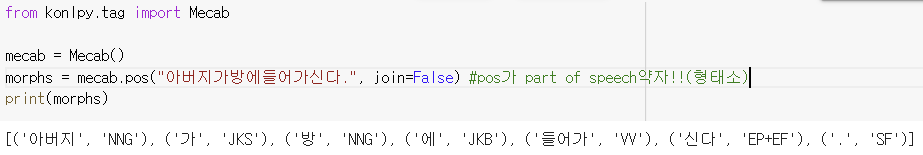

In [16]:
class Tokenizer:
    def __init__(self):
        self.tokenizer_type_list = ["word", "morph"]
        self.pad_token = "<pad>"
        self.max_seq_length = 10
        self.padding = False
    def tokenize(self, text, tokenizer_type): 
        assert tokenizer_type in self.tokenizer_type_list, "정의되지 않은 tokenizer_type입니다."
        if tokenizer_type == "word":
            tokenized_text = text.split(" ")
        elif tokenizer_type == "morph":
            tokenized_text = [lemma[0] for lemma in mecab.pos(text)]#!!!!위에 그림 참고!!!!
        if self.padding:
            tokenized_text += [self.pad_token] * (self.max_seq_length - len(tokenized_text))
            return tokenized_text[:self.max_seq_length]
        else:
            return tokenized_text[:self.max_seq_length]
    def batch_tokenize(self, texts, tokenizer_type):
        for i, text in enumerate(texts):
            texts[i] = self.tokenize(text, tokenizer_type)
        return texts

In [17]:
my_tokenizer = Tokenizer()
my_tokenizer.pad_token = "[PAD]"
my_tokenizer.max_seq_length = 10
my_tokenizer.padding = True

In [18]:
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "morph"))
print(my_tokenizer.batch_tokenize(["이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다."], "morph"))

['이순신', '은', '조선', '중기', '의', '무신', '이', '다', '.', '[PAD]']
[['이순신', '은', '조선', '중기', '의', '무신', '이', '다', '.', '[PAD]'], ['그', '는', '임진왜란', '을', '승리', '로', '이끌', '었', '다', '.']]


## 음절 단위 tokenizing

음절 단위 tokenizing은 한 자연어를 한 글자씩 분리합니다.<br>
이건 그냥 list(문장) 씌워주면 알아서 한 글자씩 분리

In [19]:
text = "이순신은 조선 중기의 무신이다."
tokenized_text = list(text)    # split 함수는 입력 string에 대해서 특정 string을 기반으로 분리해줍니다.
print(tokenized_text)  

['이', '순', '신', '은', ' ', '조', '선', ' ', '중', '기', '의', ' ', '무', '신', '이', '다', '.']


In [20]:
class Tokenizer:
    def __init__(self):
        self.tokenizer_type_list = ["word", "morph", "syllable"]
        self.pad_token = "<pad>"
        self.max_seq_length = 10
        self.padding = False
    def tokenize(self, text, tokenizer_type): 
        assert tokenizer_type in self.tokenizer_type_list, "정의되지 않은 tokenizer_type입니다."
        if tokenizer_type == "word":
            tokenized_text = text.split(" ")
        elif tokenizer_type == "morph":
            tokenized_text = [lemma[0] for lemma in mecab.pos(text)]
        elif tokenizer_type == "syllable":
            tokenized_text = list(text)
        if self.padding:
            tokenized_text += [self.pad_token] * (self.max_seq_length - len(tokenized_text))
            return tokenized_text[:self.max_seq_length]
        else:
            return tokenized_text[:self.max_seq_length]
    def batch_tokenize(self, texts, tokenizer_type):
        for i, text in enumerate(texts):
            texts[i] = self.tokenize(text, tokenizer_type)
        return texts

In [21]:
my_tokenizer = Tokenizer()
my_tokenizer.pad_token = "[PAD]"
my_tokenizer.max_seq_length = 20
my_tokenizer.padding = True

In [22]:
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "syllable"))
print(my_tokenizer.batch_tokenize(["이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다."], "syllable"))

['이', '순', '신', '은', ' ', '조', '선', ' ', '중', '기', '의', ' ', '무', '신', '이', '다', '.', '[PAD]', '[PAD]', '[PAD]']
[['이', '순', '신', '은', ' ', '조', '선', ' ', '중', '기', '의', ' ', '무', '신', '이', '다', '.', '[PAD]', '[PAD]', '[PAD]'], ['그', '는', ' ', '임', '진', '왜', '란', '을', ' ', '승', '리', '로', ' ', '이', '끌', '었', '다', '.', '[PAD]', '[PAD]']]


## 자소 단위 tokenizing

한글은 하나의 문자도 최대 초성, 중성, 종성, 총 3개의 자소로 분리가 가능합니다.   
실습에서는 자소 분리를 위해 hgtk 라이브러리를 사용하겠습니다.

In [23]:
!pip install hgtk

  Created wheel for hgtk: filename=hgtk-0.1.3-py2.py3-none-any.whl size=6689 sha256=1edad9adc4b0bf9f75145c55aca2d9dfe745ea61e1efd9bbc5c14d15e0f08183
  Stored in directory: /root/.cache/pip/wheels/a6/e9/bc/524beb5222b11aa439a23a07be5bd8a559d266153103c37979
Successfully built hgtk


In [24]:
import hgtk

In [25]:
text = "이순신은 조선 중기의 무신이다."
tokenized_text = list(hgtk.text.decompose(text))
print(tokenized_text)
# ㅇ ㅣ ㅅ ㅜ ㄴ ㅅ ㅣ ... 

['ㅇ', 'ㅣ', 'ᴥ', 'ㅅ', 'ㅜ', 'ㄴ', 'ᴥ', 'ㅅ', 'ㅣ', 'ㄴ', 'ᴥ', 'ㅇ', 'ㅡ', 'ㄴ', 'ᴥ', ' ', 'ㅈ', 'ㅗ', 'ᴥ', 'ㅅ', 'ㅓ', 'ㄴ', 'ᴥ', ' ', 'ㅈ', 'ㅜ', 'ㅇ', 'ᴥ', 'ㄱ', 'ㅣ', 'ᴥ', 'ㅇ', 'ㅢ', 'ᴥ', ' ', 'ㅁ', 'ㅜ', 'ᴥ', 'ㅅ', 'ㅣ', 'ㄴ', 'ᴥ', 'ㅇ', 'ㅣ', 'ᴥ', 'ㄷ', 'ㅏ', 'ᴥ', '.']


In [26]:
class Tokenizer:
    def __init__(self):
        self.tokenizer_type_list = ["word", "morph", "syllable", "jaso"]
        self.pad_token = "<pad>"
        self.max_seq_length = 10
        self.padding = False
    def tokenize(self, text, tokenizer_type): 
        assert tokenizer_type in self.tokenizer_type_list, "정의되지 않은 tokenizer_type입니다."
        if tokenizer_type == "word":
            tokenized_text = text.split(" ")
        elif tokenizer_type == "morph":
            tokenized_text = [lemma[0] for lemma in mecab.pos(text)]
        elif tokenizer_type == "syllable":
            tokenized_text = list(text)
        elif tokenizer_type == "jaso":
            tokenized_text = list(hgtk.text.decompose(text))
        if self.padding:
            tokenized_text += [self.pad_token] * (self.max_seq_length - len(tokenized_text))
            return tokenized_text[:self.max_seq_length]
        else:
            return tokenized_text[:self.max_seq_length]
    def batch_tokenize(self, texts, tokenizer_type):
        for i, text in enumerate(texts):
            texts[i] = self.tokenize(text, tokenizer_type)
        return texts

In [27]:
my_tokenizer = Tokenizer()
my_tokenizer.pad_token = "[PAD]"
my_tokenizer.max_seq_length = 20
my_tokenizer.padding = True

In [28]:
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "jaso"))
print(my_tokenizer.batch_tokenize(["이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다."], "jaso"))

['ㅇ', 'ㅣ', 'ᴥ', 'ㅅ', 'ㅜ', 'ㄴ', 'ᴥ', 'ㅅ', 'ㅣ', 'ㄴ', 'ᴥ', 'ㅇ', 'ㅡ', 'ㄴ', 'ᴥ', ' ', 'ㅈ', 'ㅗ', 'ᴥ', 'ㅅ']
[['ㅇ', 'ㅣ', 'ᴥ', 'ㅅ', 'ㅜ', 'ㄴ', 'ᴥ', 'ㅅ', 'ㅣ', 'ㄴ', 'ᴥ', 'ㅇ', 'ㅡ', 'ㄴ', 'ᴥ', ' ', 'ㅈ', 'ㅗ', 'ᴥ', 'ㅅ'], ['ㄱ', 'ㅡ', 'ᴥ', 'ㄴ', 'ㅡ', 'ㄴ', 'ᴥ', ' ', 'ㅇ', 'ㅣ', 'ㅁ', 'ᴥ', 'ㅈ', 'ㅣ', 'ㄴ', 'ᴥ', 'ㅇ', 'ㅙ', 'ᴥ', 'ㄹ']]


## WordPiece tokenizing

In [29]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 4.3 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 636 kB 48.3 MB/s 
     |████████████████████████████████| 3.3 MB 24.8 MB/s 
     |████████████████████████████████| 895 kB 44.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [30]:
!mkdir wordPieceTokenizer

In [31]:
from tokenizers import BertWordPieceTokenizer #tokenizer안에 Bert를 위한 WordPieceTokenizer가 들어있다

# Initialize an empty tokenizer
wp_tokenizer = BertWordPieceTokenizer(
    clean_text=True,    # [이순신, ##은, ' ', 조선]-> cleantext를 True로 주면 ' '와 같은건 지워준다. 그리고 Bert도 cleantext기반으로 학습한다!!
    handle_chinese_chars=True, #본문내에 존재하는 한자들이 글자단위로 분리가 된다(중국어는 띄어쓰기라는게 없다. 분석시 한음절 단위로 분석해야)
    strip_accents=False,    # True: [YepHamza] -> [Yep, Hamza]
    lowercase=False,  #모든 알파벳을 다 소문자로 바꿔준다. False로 주는게 더 성능이 좋다
)
'''
위는 tokenizer에 대한 option을 만들어 준것
아래는 train시키는 것(word piece tokenizing학습이 진행된다)
'''
# And then train
wp_tokenizer.train(
    files="my_data/wiki_20190620_small.txt",
    vocab_size=10000,#vocab개수를 10000로 하고 싶다. 이게 개수가 많으면, 거의 음절 단위로 다 잘라지게 된다 
    min_frequency=2,#2개 이하로 등장하는 애는 vocab목록으로 만들지 않겠다
    show_progress=True,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"],#special token은 왼쪽과 같이 hard fix돼 있다. padding, unknown, 맨앞단, 맨뒷단, masking 을 위한 토큰 
    limit_alphabet=1000,
    wordpieces_prefix="##"
)

# Save the files
wp_tokenizer.save_model("wordPieceTokenizer", "my_tokenizer")

['wordPieceTokenizer/my_tokenizer-vocab.txt']

In [32]:
print(wp_tokenizer.get_vocab_size())

10000


In [33]:
text = "이순신은 조선 중기의 무신이다."
tokenized_text = wp_tokenizer.encode(text)
print(tokenized_text)
print(tokenized_text.tokens)
print(tokenized_text.ids)

Encoding(num_tokens=10, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['이', '##순', '##신은', '조선', '중', '##기의', '무', '##신이', '##다', '.']
[707, 1057, 7630, 2002, 755, 2606, 453, 8513, 1038, 16]


In [34]:
class Tokenizer:
    def __init__(self):
        self.tokenizer_type_list = ["word", "morph", "syllable", "jaso", "wordPiece"] # tokenizer타입에 wordpiece를 추가!!
        self.pad_token = "<pad>"
        self.max_seq_length = 10
        self.padding = False
    def tokenize(self, text, tokenizer_type): 
        assert tokenizer_type in self.tokenizer_type_list, "정의되지 않은 tokenizer_type입니다."
        if tokenizer_type == "word":
            tokenized_text = text.split(" ")
        elif tokenizer_type == "morph":
            tokenized_text = [lemma[0] for lemma in mecab.pos(text)]
        elif tokenizer_type == "syllable":
            tokenized_text = list(text)
        elif tokenizer_type == "jaso":
            tokenized_text = list(hgtk.text.decompose(text))
        elif tokenizer_type == "wordPiece":
            tokenized_text = wp_tokenizer.encode(text).tokens
        if self.padding:
            tokenized_text += [self.pad_token] * (self.max_seq_length - len(tokenized_text))
            return tokenized_text[:self.max_seq_length]
        else:
            return tokenized_text[:self.max_seq_length]
    def batch_tokenize(self, texts, tokenizer_type):
        for i, text in enumerate(texts):
            texts[i] = self.tokenize(text, tokenizer_type)
        return texts

In [35]:
my_tokenizer = Tokenizer()
my_tokenizer.pad_token = "[PAD]"
my_tokenizer.max_seq_length = 10
my_tokenizer.padding = True

In [36]:
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "wordPiece"))
print(my_tokenizer.batch_tokenize(["이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다."], "wordPiece"))

['이', '##순', '##신은', '조선', '중', '##기의', '무', '##신이', '##다', '.']
[['이', '##순', '##신은', '조선', '중', '##기의', '무', '##신이', '##다', '.'], ['그는', '임진', '##왜', '##란을', '승리', '##로', '이끌었다', '.', '[PAD]', '[PAD]']]


구현된 tokenizing 함수들을 모두 확인해보겠습니다.

In [37]:
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "word"))
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "morph"))
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "syllable"))
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "jaso"))
print(my_tokenizer.tokenize("이순신은 조선 중기의 무신이다.", "wordPiece"))

['이순신은', '조선', '중기의', '무신이다.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
['이순신', '은', '조선', '중기', '의', '무신', '이', '다', '.', '[PAD]']
['이', '순', '신', '은', ' ', '조', '선', ' ', '중', '기']
['ㅇ', 'ㅣ', 'ᴥ', 'ㅅ', 'ㅜ', 'ㄴ', 'ᴥ', 'ㅅ', 'ㅣ', 'ㄴ']
['이', '##순', '##신은', '조선', '중', '##기의', '무', '##신이', '##다', '.']
